In [ ]:
import os 
import random 
import cv2 
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt
import yaml 
import shutil

IMAGES_DIR = '/shared/bg40/cv_datasets/tiger-pose/train/images/'
LABELS_DIR = IMAGES_DIR.replace('images', 'labels')

Opening image file /shared/bg40/surgical_video_datasets/EndoVis15_Tracking_Dataset_yoloformat/images/train/dataset2_frame0390.png
Opening annotation file /shared/bg40/surgical_video_datasets/EndoVis15_Tracking_Dataset_yoloformat/labels/train/dataset2_frame0390.txt
[0.481944, 0.564236, 2.0, 0.476389, 0.548611, 2.0, 0.618056, 0.453125, 2.0, 0.7125, 0.442708, 2.0]
Opening image file /shared/bg40/surgical_video_datasets/EndoVis15_Tracking_Dataset_yoloformat/images/train/dataset4_frame0720.png
Opening annotation file /shared/bg40/surgical_video_datasets/EndoVis15_Tracking_Dataset_yoloformat/labels/train/dataset4_frame0720.txt
[0.505263, 0.331579, 2.0, 0.501053, 0.321053, 2.0, 0.6, 0.256944, 2.0, 0.663158, 0.263158, 2.0]
Opening image file /shared/bg40/surgical_video_datasets/EndoVis15_Tracking_Dataset_yoloformat/images/train/dataset2_frame0940.png
Opening annotation file /shared/bg40/surgical_video_datasets/EndoVis15_Tracking_Dataset_yoloformat/labels/train/dataset2_frame0940.txt
[0.501389,

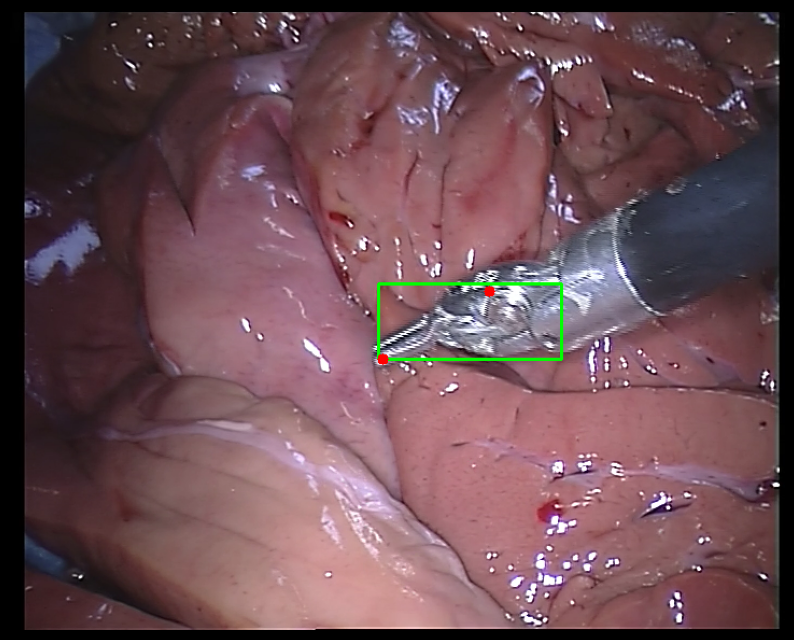

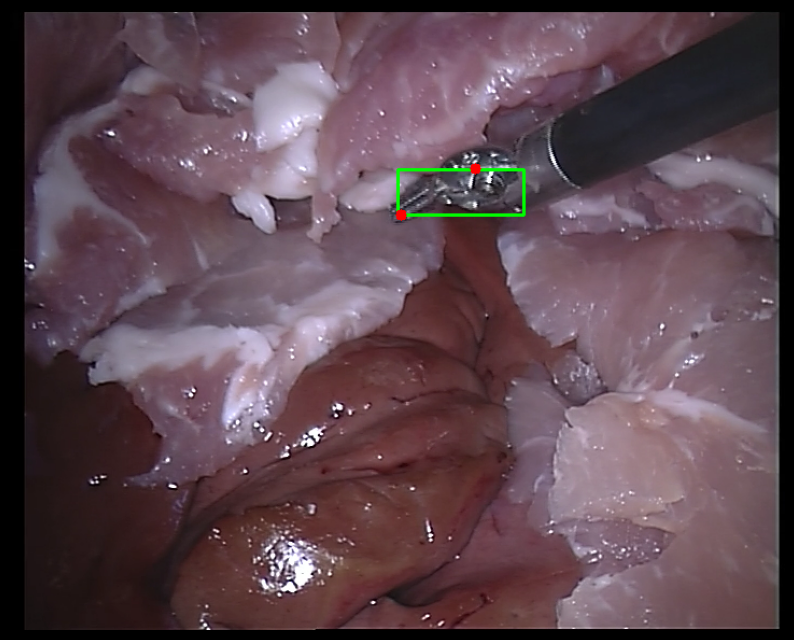

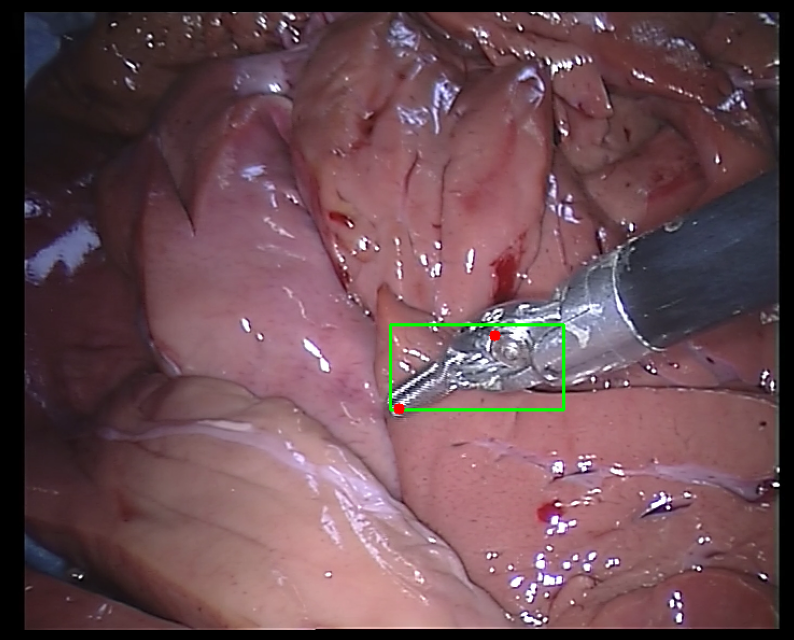

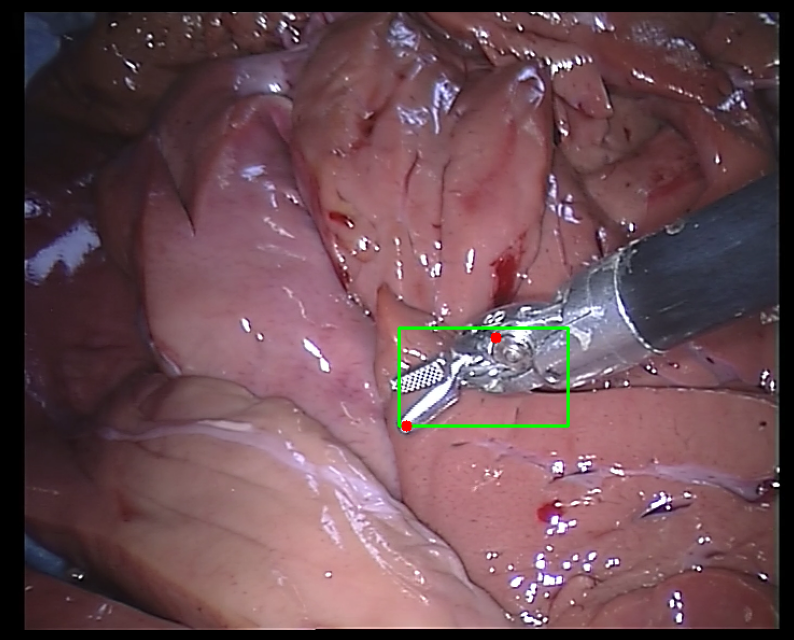

In [ ]:
# Function to parse YOLO pose format annotation
def parse_yolo_pose(annotation_path):
    with open(annotation_path, 'r') as file:
        line = file.readline().strip().split()
        data = list(map(float, line[1:]))  # Skip class index
        bbox = data[:4]  # Bounding box format: [x, y, width, height]
        keypoints = data[4:]  # Keypoints format: [px1, py1, px2, py2, ..., pxn, pyn]
    return bbox, keypoints

# Function to draw bounding box and keypoints on an image
def draw_annotations(image, bbox, keypoints):
    h, w, _ = image.shape
    x, y, bw, bh = bbox
    # Convert YOLO normalized coordinates to pixel values
    x1, y1 = int((x - bw / 2) * w), int((y - bh / 2) * h)
    x2, y2 = int((x + bw / 2) * w), int((y + bh / 2) * h)
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Draw keypoints
    for i in range(0, len(keypoints), 2):
        kp_x = int(keypoints[i] * w)
        kp_y = int(keypoints[i+1] * h)
        cv2.circle(image, (kp_x, kp_y), 5, (0, 0, 255), -1)
    return image

# Function to display images one by one with black background
def display_images_one_by_one(images):
    for img in images:
        fig, ax = plt.subplots(figsize=(10, 10))
        fig.patch.set_facecolor('black')  # Set background color to black
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
        ax.set_facecolor('black')  # Set subplot's background color to black
        plt.show()

# Main function to select images and plot annotations one by one
def plot_random_annotations(data_folder, num_images=4):
    # Get all image file paths
    image_files = [f for f in os.listdir(data_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]
    selected_images = random.sample(image_files, num_images)
    
    annotated_images = []
    for image_file in selected_images:
        # Load the image
        image_path = os.path.join(data_folder, image_file)
        print(f"Opening image file {image_path}")
        image = cv2.imread(image_path)
        
        # Load corresponding annotation file
        annotation_path = os.path.join(LABELS_DIR, image_file.replace('.jpg', '.txt').replace('.jpeg', '.txt').replace('.png', '.txt'))
        print(f"Opening annotation file {annotation_path}")
        if os.path.exists(annotation_path):
            bbox, keypoints = parse_yolo_pose(annotation_path)
            # Draw bounding box and keypoints on the image
            annotated_image = draw_annotations(image, bbox, keypoints)
            annotated_images.append(annotated_image)
    
    # Display images one by one
    display_images_one_by_one(annotated_images)

# Run the function with the desired number of images
annotated_images = plot_random_annotations(IMAGES_DIR, num_images=4)
